In [ ]:
cd ..

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_series = pd.read_parquet("child-mind-institute-detect-sleep-states/train_series.parquet")
train_series

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [6]:
series = train_series[train_series['series_id'] == "038441c925bb"]
series['timestamp'] = pd.to_datetime(series['timestamp'])
series

/var/folders/1t/7mfrmh2s0r17tk3yntzzmsjw0000gn/T/ipykernel_1368/2260091825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['timestamp'] = pd.to_datetime(series['timestamp'])


,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14 15:30:00-04:00,2.636700,0.0217
1,038441c925bb,1,2018-08-14 15:30:05-04:00,2.636800,0.0215
2,038441c925bb,2,2018-08-14 15:30:10-04:00,2.637000,0.0216
3,038441c925bb,3,2018-08-14 15:30:15-04:00,2.636800,0.0213
4,038441c925bb,4,2018-08-14 15:30:20-04:00,2.636800,0.0215
...,...,...,...,...,...
389875,038441c925bb,389875,2018-09-06 04:59:35-04:00,-27.373899,0.0110
389876,038441c925bb,389876,2018-09-06 04:59:40-04:00,-27.493799,0.0110
389877,038441c925bb,389877,2018-09-06 04:59:45-04:00,-27.533701,0.0111
389878,038441c925bb,389878,2018-09-06 04:59:50-04:00,-28.003599,0.0111


In [31]:
series["time_diff"] = series['timestamp'].diff().dt.total_seconds()
print(series.time_diff.unique())
series

[nan  5.]


/var/folders/1t/7mfrmh2s0r17tk3yntzzmsjw0000gn/T/ipykernel_1368/3545248690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["time_diff"] = series['timestamp'].diff().dt.total_seconds()


,series_id,step,timestamp,anglez,enmo,time_diff
0,038441c925bb,0,2018-08-14 15:30:00-04:00,2.636700,0.0217,NaN
1,038441c925bb,1,2018-08-14 15:30:05-04:00,2.636800,0.0215,5.0
2,038441c925bb,2,2018-08-14 15:30:10-04:00,2.637000,0.0216,5.0
3,038441c925bb,3,2018-08-14 15:30:15-04:00,2.636800,0.0213,5.0
4,038441c925bb,4,2018-08-14 15:30:20-04:00,2.636800,0.0215,5.0
...,...,...,...,...,...,...
389875,038441c925bb,389875,2018-09-06 04:59:35-04:00,-27.373899,0.0110,5.0
389876,038441c925bb,389876,2018-09-06 04:59:40-04:00,-27.493799,0.0110,5.0
389877,038441c925bb,389877,2018-09-06 04:59:45-04:00,-27.533701,0.0111,5.0
389878,038441c925bb,389878,2018-09-06 04:59:50-04:00,-28.003599,0.0111,5.0


/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

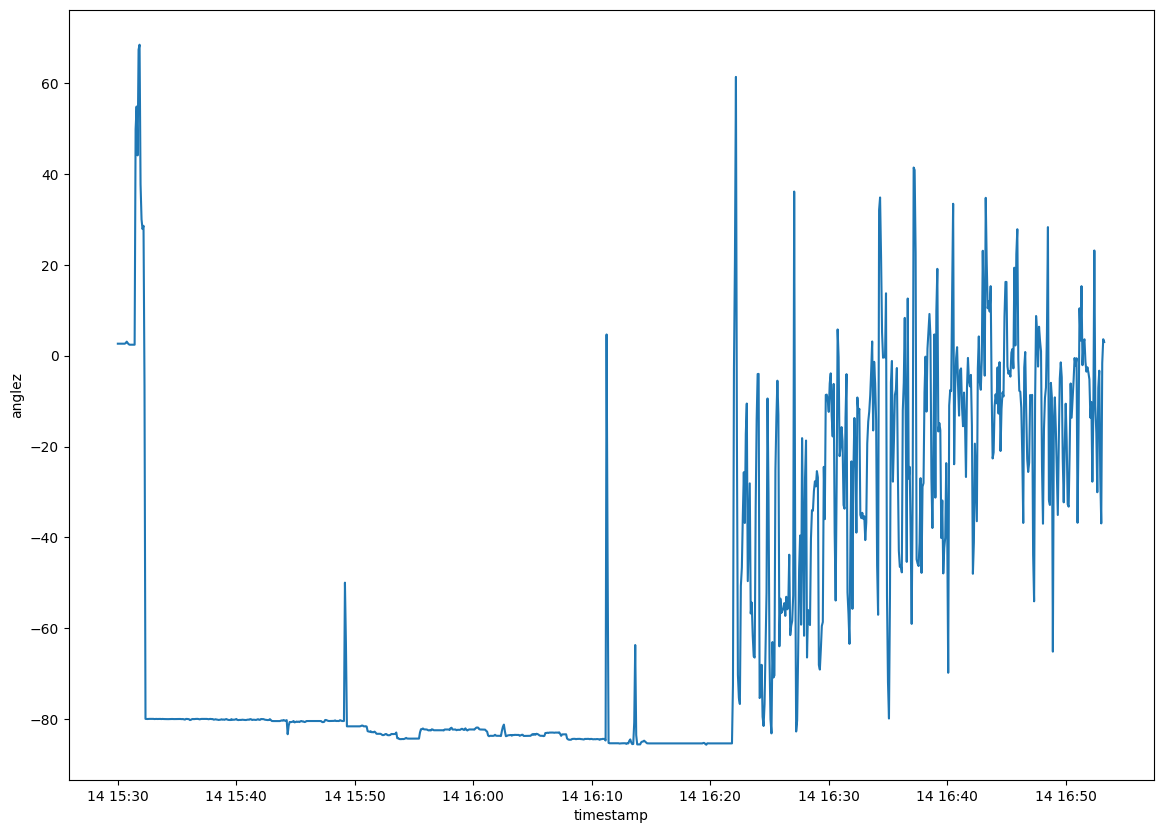

In [40]:
plt.figure(figsize=(14, 10))
sns.lineplot(y="anglez", x="timestamp", data=series.iloc[0:1000])
plt.show()

In [41]:
train_events = pd.read_csv("child-mind-institute-detect-sleep-states/train_events.csv")
train_events['timestamp'] = pd.to_datetime(train_events['timestamp'])
train_events

/var/folders/1t/7mfrmh2s0r17tk3yntzzmsjw0000gn/T/ipykernel_1368/2382262503.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  train_events['timestamp'] = pd.to_datetime(train_events['timestamp'])


,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00-04:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00-04:00
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00-04:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00-04:00
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00-04:00
...,...,...,...,...,...
14505,fe90110788d2,33,wakeup,560604.0,2017-09-06 04:07:00-04:00
14506,fe90110788d2,34,onset,574620.0,2017-09-06 23:35:00-04:00
14507,fe90110788d2,34,wakeup,581604.0,2017-09-07 09:17:00-04:00
14508,fe90110788d2,35,onset,NaN,NaT


In [42]:
events = train_events[train_events['series_id'] == "038441c925bb"]
events['timestamp'] = pd.to_datetime(events['timestamp'])
events

/var/folders/1t/7mfrmh2s0r17tk3yntzzmsjw0000gn/T/ipykernel_1368/2143881465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['timestamp'] = pd.to_datetime(events['timestamp'])


,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00-04:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00-04:00
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00-04:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00-04:00
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00-04:00
5,038441c925bb,3,wakeup,44400.0,2018-08-17 05:10:00-04:00
6,038441c925bb,4,onset,57240.0,2018-08-17 23:00:00-04:00
7,038441c925bb,4,wakeup,62856.0,2018-08-18 06:48:00-04:00
8,038441c925bb,5,onset,NaN,NaT
9,038441c925bb,5,wakeup,NaN,NaT


In [43]:
## For each subject i want to merge the accerlerometer reading to the time of sleep onset or wakeup using the steps

combined =  series.merge(events, how='left', on='step')
combined.iloc[4990:5000]

,series_id_x,step,timestamp_x,anglez,enmo,time_diff,series_id_y,night,event,timestamp_y
4990,038441c925bb,4990,2018-08-14 22:25:50-04:00,-78.709801,0.0097,5.0,NaN,NaN,NaN,NaT
4991,038441c925bb,4991,2018-08-14 22:25:55-04:00,-78.730301,0.0104,5.0,NaN,NaN,NaN,NaT
4992,038441c925bb,4992,2018-08-14 22:26:00-04:00,-78.690598,0.0099,5.0,038441c925bb,1.0,onset,2018-08-14 22:26:00-04:00
4993,038441c925bb,4993,2018-08-14 22:26:05-04:00,-78.664902,0.0099,5.0,NaN,NaN,NaN,NaT
4994,038441c925bb,4994,2018-08-14 22:26:10-04:00,-78.465897,0.0101,5.0,NaN,NaN,NaN,NaT
4995,038441c925bb,4995,2018-08-14 22:26:15-04:00,-78.454597,0.0098,5.0,NaN,NaN,NaN,NaT
4996,038441c925bb,4996,2018-08-14 22:26:20-04:00,-78.537804,0.0098,5.0,NaN,NaN,NaN,NaT
4997,038441c925bb,4997,2018-08-14 22:26:25-04:00,-78.446999,0.0099,5.0,NaN,NaN,NaN,NaT
4998,038441c925bb,4998,2018-08-14 22:26:30-04:00,-78.546501,0.0097,5.0,NaN,NaN,NaN,NaT
4999,038441c925bb,4999,2018-08-14 22:26:35-04:00,-78.420998,0.0101,5.0,NaN,NaN,NaN,NaT


In [44]:
sleep_1 = combined.iloc[4992:10932]
sleep_1

,series_id_x,step,timestamp_x,anglez,enmo,time_diff,series_id_y,night,event,timestamp_y
4992,038441c925bb,4992,2018-08-14 22:26:00-04:00,-78.690598,0.0099,5.0,038441c925bb,1.0,onset,2018-08-14 22:26:00-04:00
4993,038441c925bb,4993,2018-08-14 22:26:05-04:00,-78.664902,0.0099,5.0,NaN,NaN,NaN,NaT
4994,038441c925bb,4994,2018-08-14 22:26:10-04:00,-78.465897,0.0101,5.0,NaN,NaN,NaN,NaT
4995,038441c925bb,4995,2018-08-14 22:26:15-04:00,-78.454597,0.0098,5.0,NaN,NaN,NaN,NaT
4996,038441c925bb,4996,2018-08-14 22:26:20-04:00,-78.537804,0.0098,5.0,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
10927,038441c925bb,10927,2018-08-15 06:40:35-04:00,-63.346901,0.0197,5.0,NaN,NaN,NaN,NaT
10928,038441c925bb,10928,2018-08-15 06:40:40-04:00,-63.198502,0.0197,5.0,NaN,NaN,NaN,NaT
10929,038441c925bb,10929,2018-08-15 06:40:45-04:00,-63.105000,0.0206,5.0,NaN,NaN,NaN,NaT
10930,038441c925bb,10930,2018-08-15 06:40:50-04:00,-58.177101,0.0358,5.0,NaN,NaN,NaN,NaT


/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

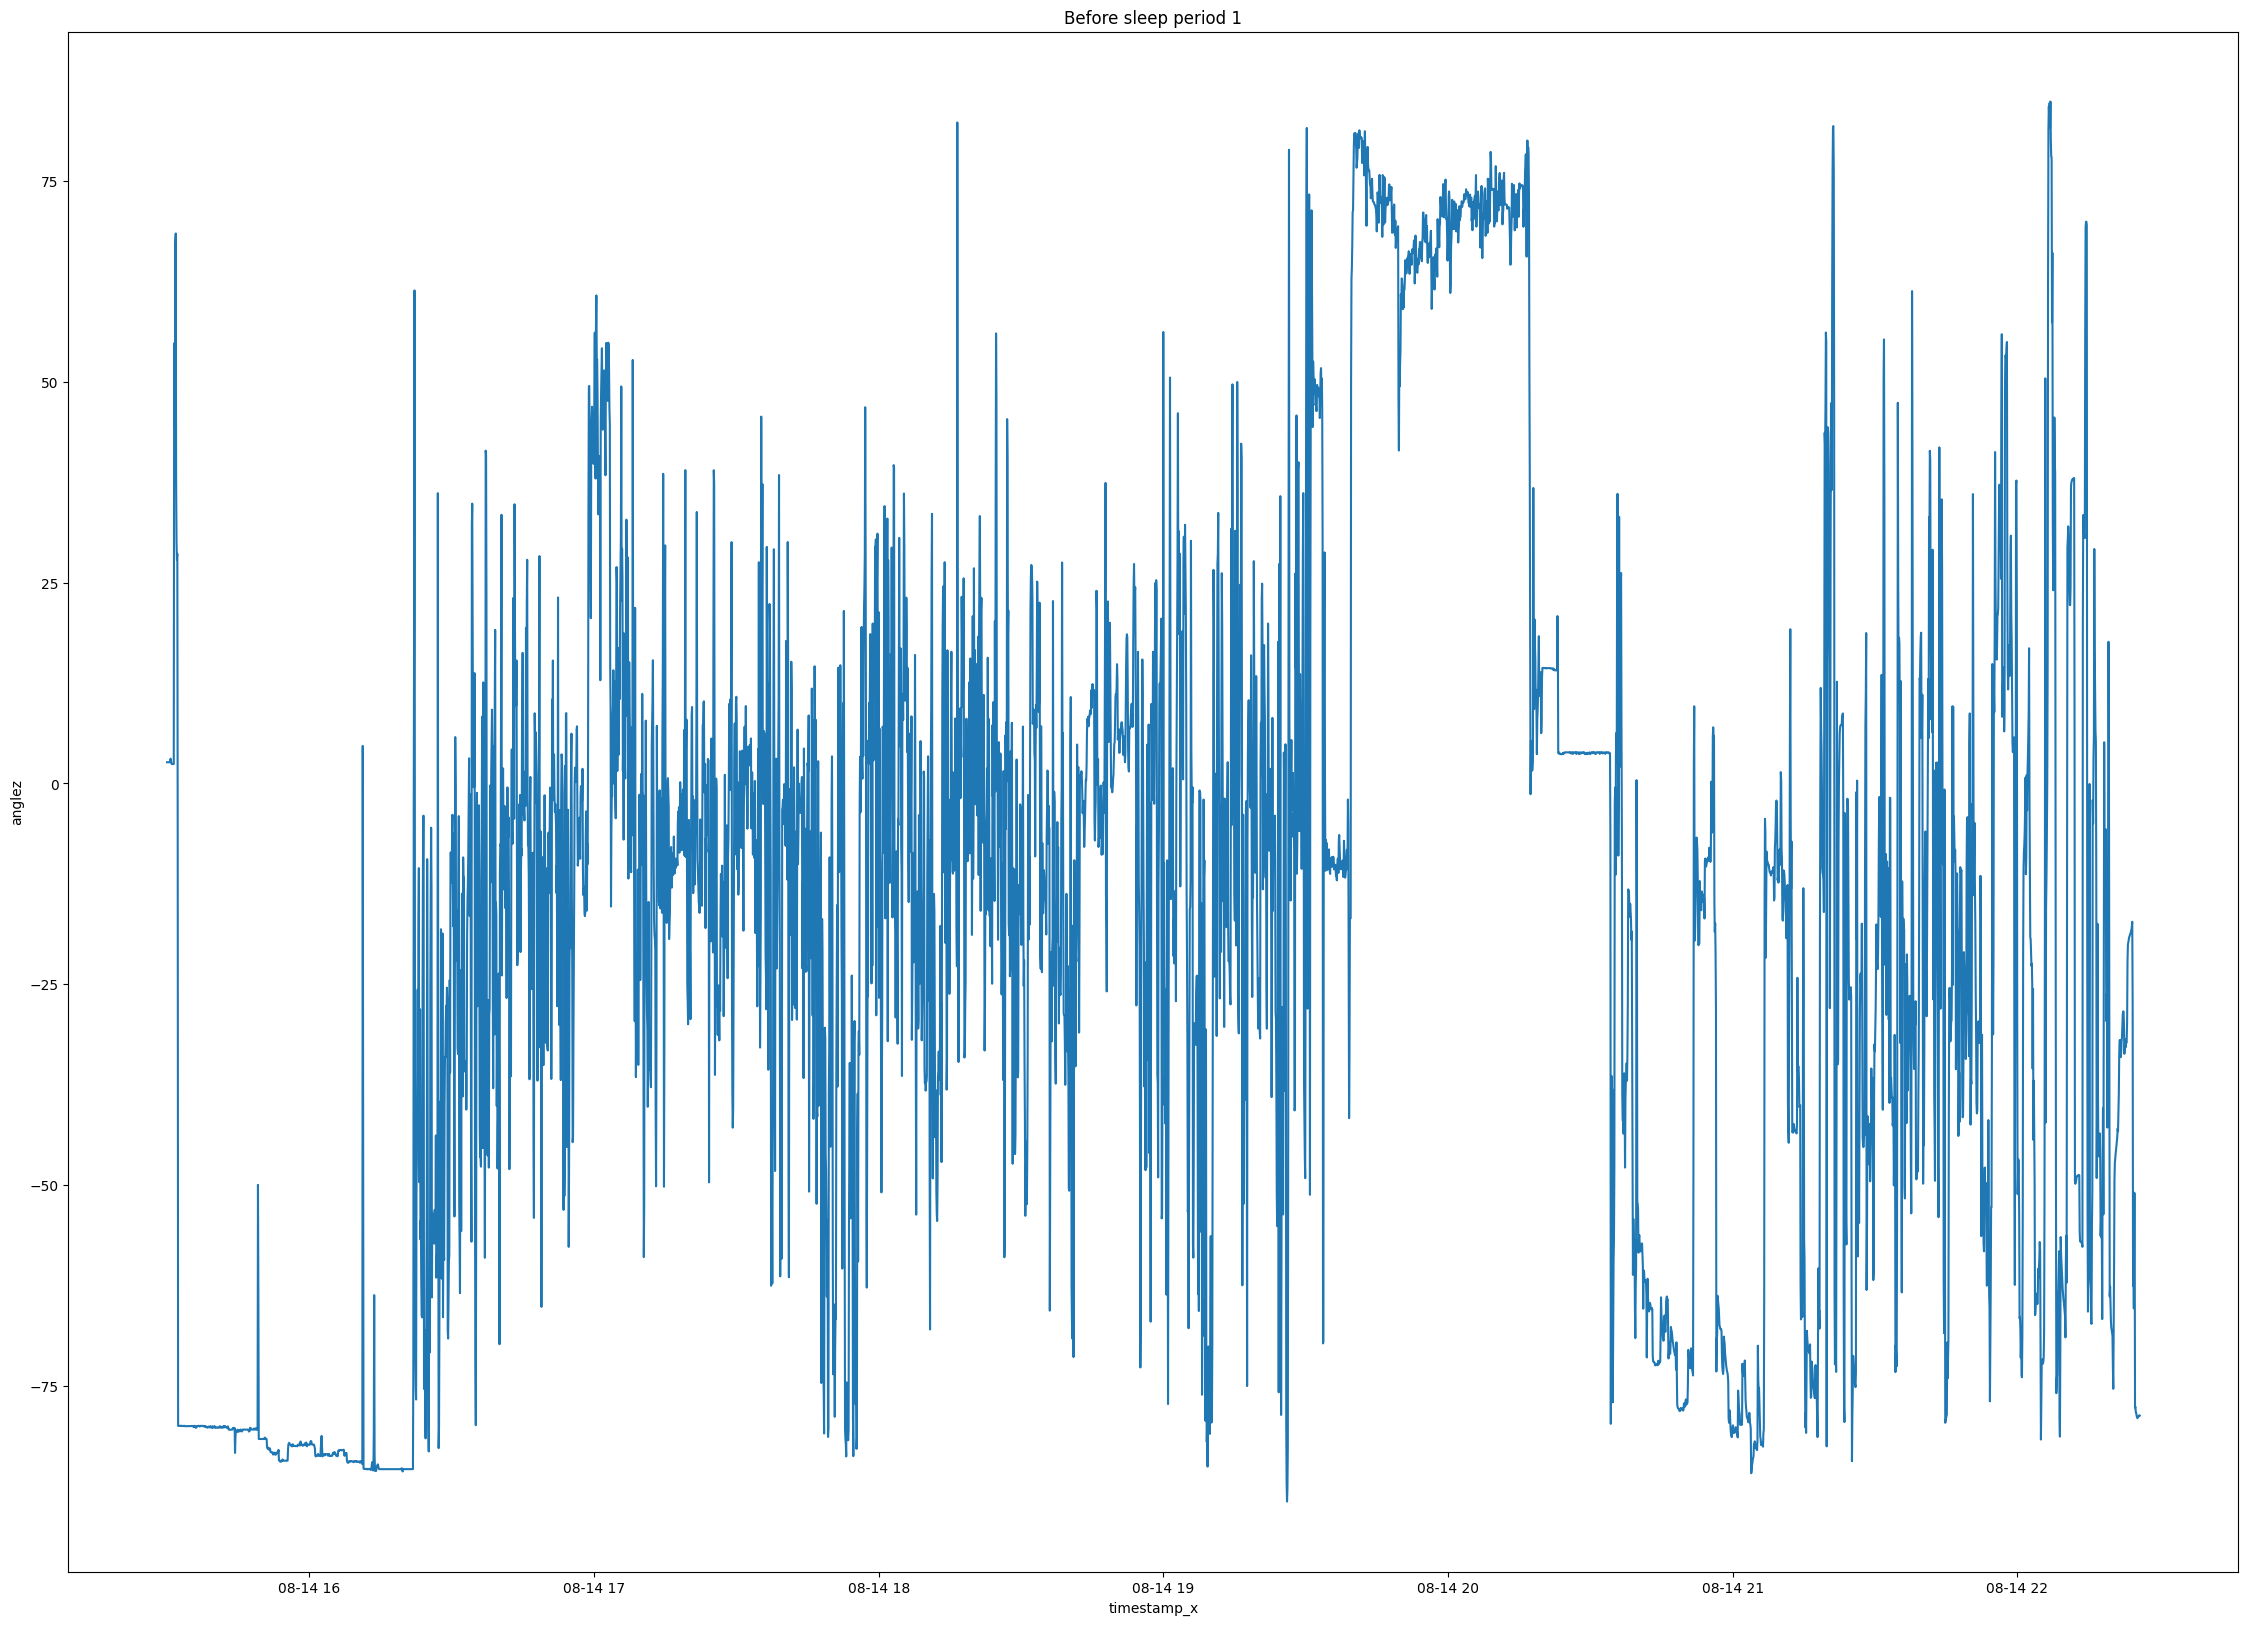

In [51]:
plt.figure(figsize=(28,20))
sns.lineplot(x='timestamp_x', y='anglez', data=combined.iloc[0:4991])
plt.title("Before sleep period 1")
plt.show()

/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olumide/Documents/Self Improvement - ML/MLapps/ML_EndtoEnd_Projects/sleep_state_detector/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

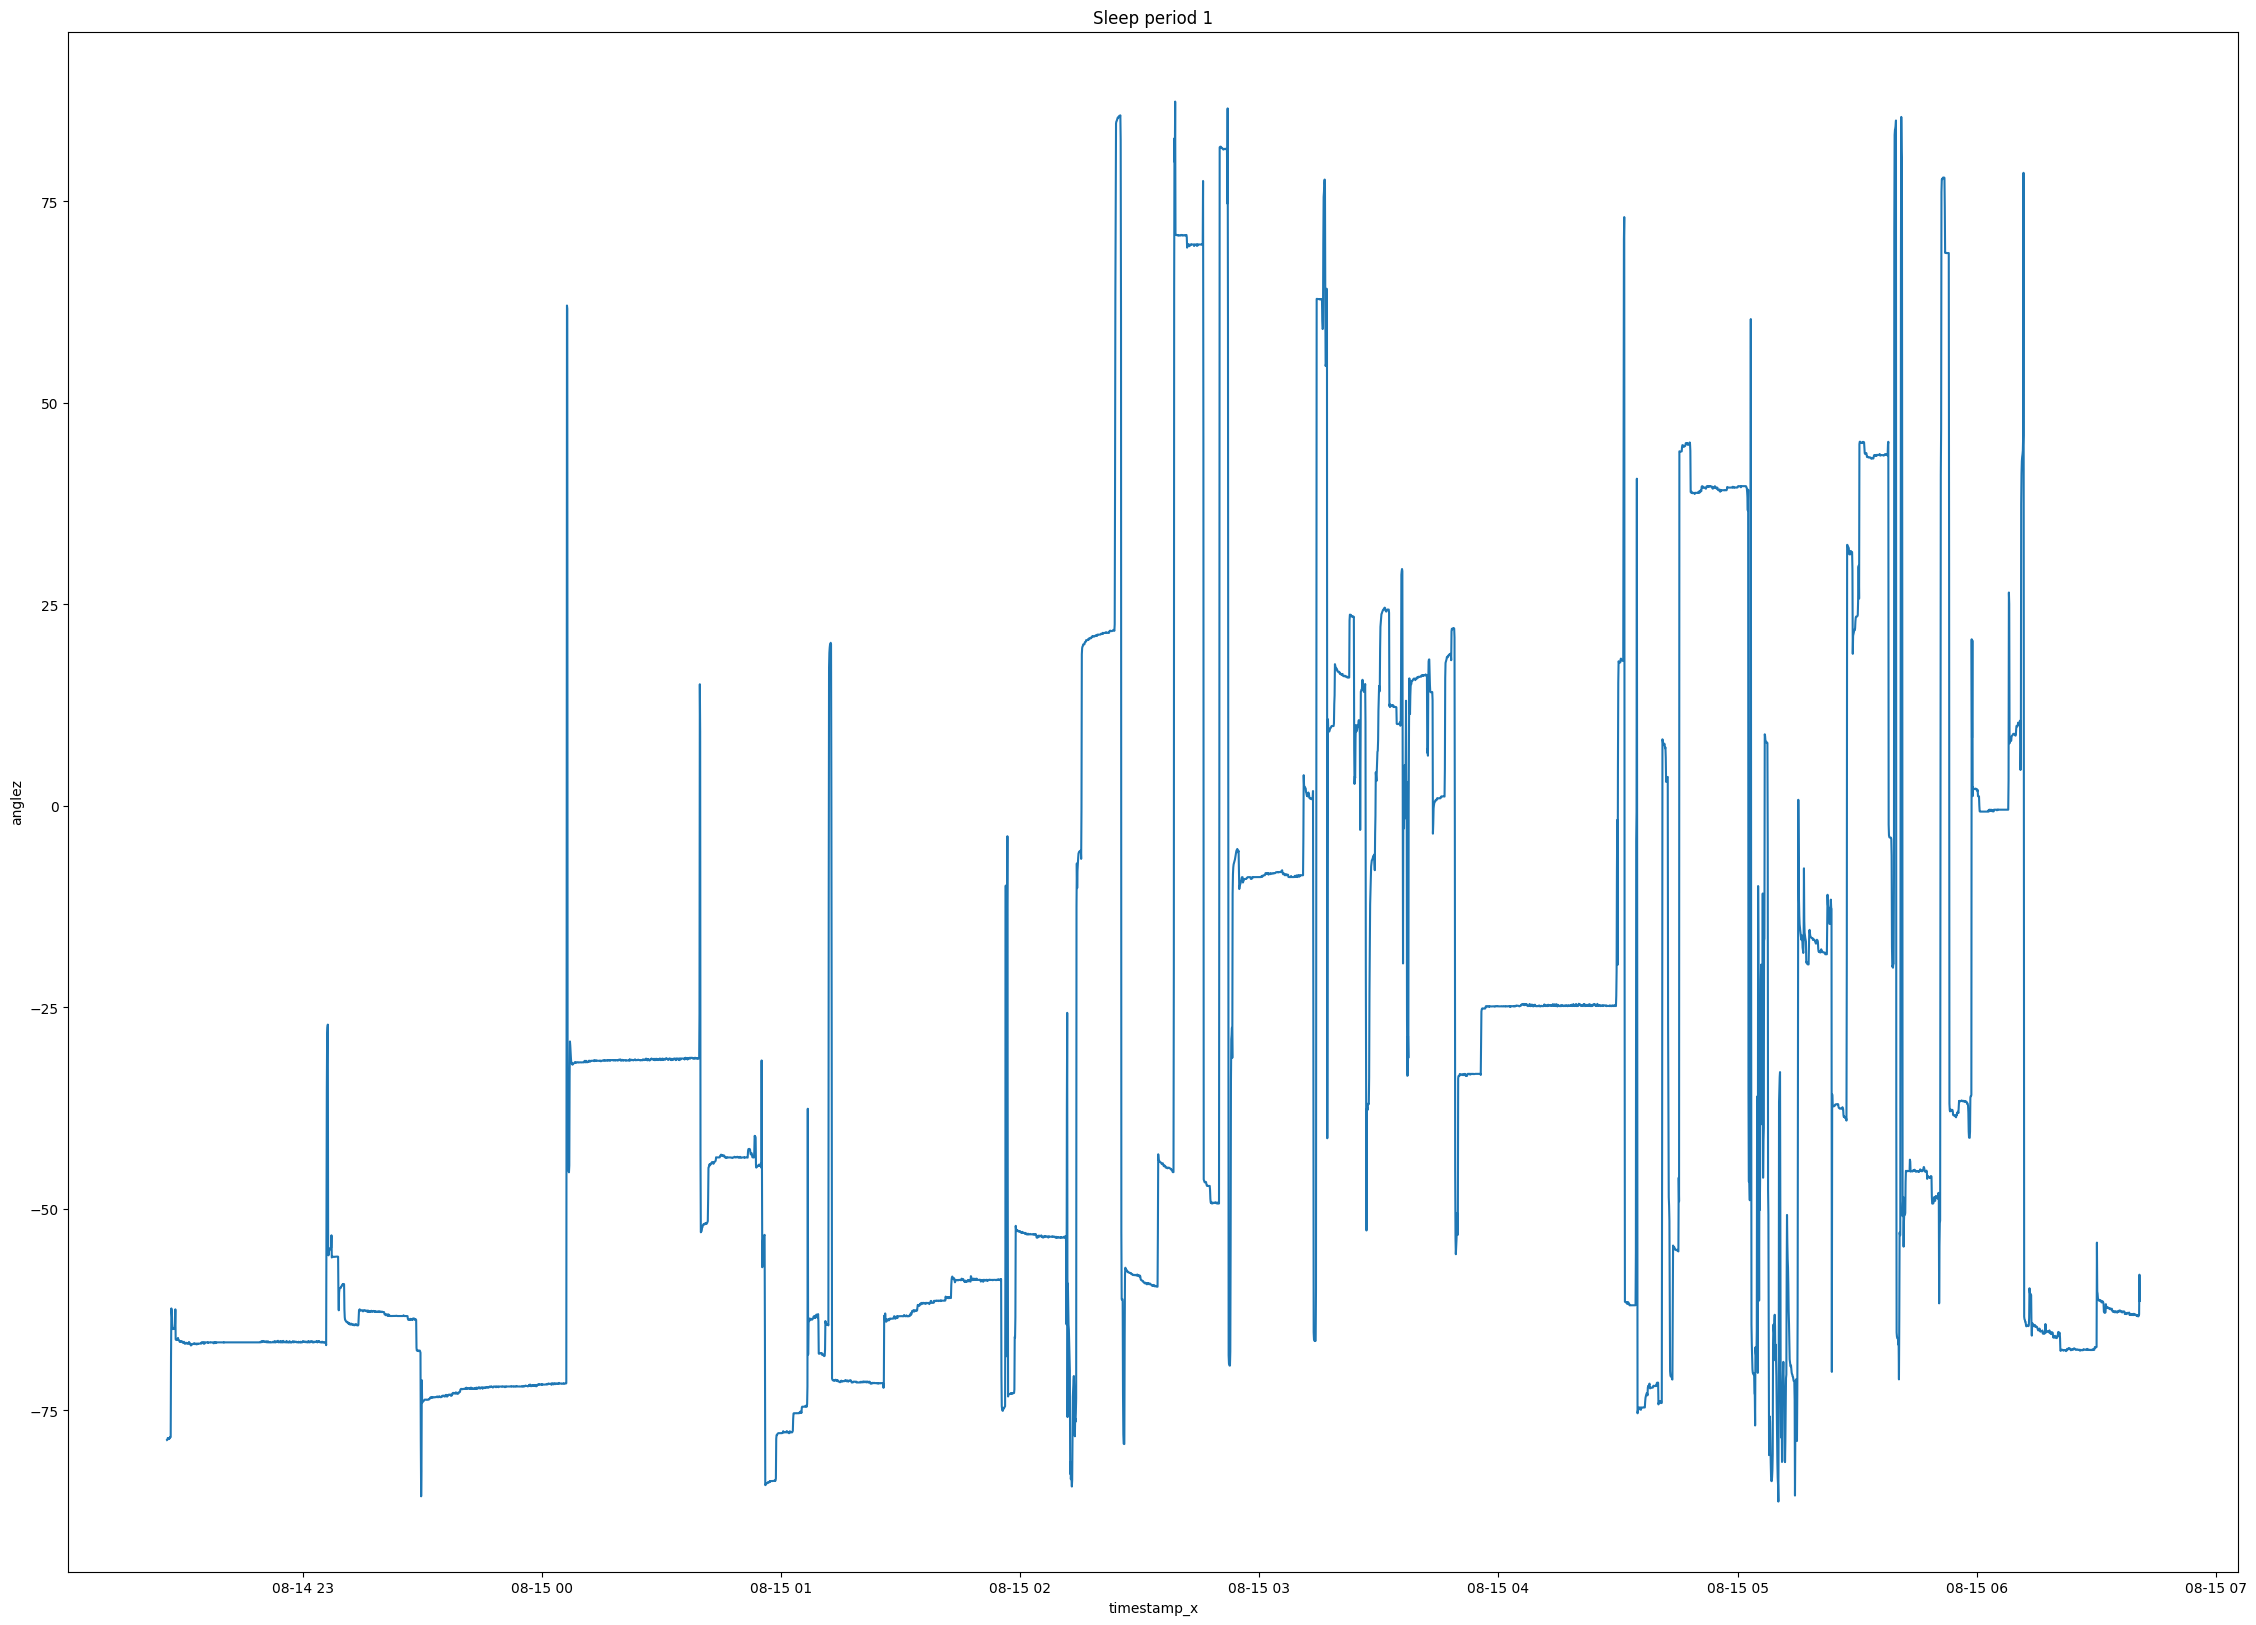

In [52]:
plt.figure(figsize=(28,20))
sns.lineplot(x='timestamp_x', y='anglez', data=sleep_1)
plt.title("Sleep period 1")
plt.show()

### My Current Understanding

    The series parquet file holds the measurement for each subject. 
    The series id is unique to each subject. 
    The step represent every measurement taken which is literally every 5 seconds.
    The anglez and enmo are the two measurements taken.

    The train event files holds the labels for each subject.
    Night aim to represents when a sleep window is established.
    The events column holds the sleep onset and wake up labels for the sleep window.
    Thus every night there is a sleep onset and wake up label which is recorded in 2 rows of the train event csv for each subject.
    Further, the step column is the link between the series and train event file, it helps identify at which step fo the series data the sleep onset and wake up labels were recorded.

In summary we can link the series and train event file by the step column and the series id column to get a full picture of the data; which is all of the measurement taken and the step at which the sleep onset and wake up labels were recorded. This way we can begin to identify a sleep window for each subject.